In [1]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:


# In Class Assignment One
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook)  before the end of class (or right after class). The initial portion of this notebook is given before class and the remainder is given during class. Please answer the initial questions before class. Once class has started you may rework your answers as a team for the initial part of the assignment. 

## Contents
* <a href="#Loading">Loading the Data</a>
* <a href="#linearnumpy">Linear Regression</a>

**These portions are not yet accessible until the start of class:**
* <a href="#sklearn">Using Scikit Learn for Regression</a>
* <a href="#classification">Linear Classification</a>

________________________________________________________________________________________________________

<a id="Loading"></a>
## Loading the Data
Please run the following code to read in the "diabetes" dataset from sklearn's data loading module. 

This will load the data into the variable `ds`. `ds` is a dictionary object with fields like `ds.data`, which is a matrix of the continuous features in the dataset. The object is not a pandas dataframe. It is a numpy matrix. Each row is a set of observed instances, each column is a different feature. It also has a field called `ds.target` that is a continuous value we are trying to predict. Each entry in `ds.target` is a label for each row of the `ds.data` matrix. 

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
#from __future__ import print_function

ds = load_diabetes()

# this holds the continuous feature data
# because ds.data is a matrix, there are some special properties we can access (like 'shape')
print('features shape:', ds.data.shape, 'format is:', ('rows','columns')) # there are 442 instances and 10 features per instance
print('range of target:', np.min(ds.target),np.max(ds.target))

features shape: (442, 10) format is: ('rows', 'columns')
range of target: 25.0 346.0


In [3]:
from pprint import pprint

# we can set the fields inside of ds and set them to new variables in python
pprint(ds.data) # prints out elements of the matrix
pprint(ds.target) # prints the vector (all 442 items)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])
array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37

In [4]:
# Explotring Dataset
print(ds.data.shape)
print(ds.target.shape)

(442, 10)
(442,)


In [5]:
ds.data[0:2]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405]])

In [6]:
ds.data[441]

array([-0.04547248, -0.04464164, -0.0730303 , -0.08141377,  0.08374012,
        0.02780893,  0.17381578, -0.03949338, -0.00421986,  0.00306441])

________________________________________________________________________________________________________
<a id="linearnumpy"></a>
## Using Linear Regression 
In the videos, we derived the formula for calculating the optimal values of the regression weights (you must be connected to the internet for this equation to show up properly):

$$ w = (X^TX)^{-1}X^Ty $$

where $X$ is the matrix of values with a bias column of ones appended onto it. For the diabetes dataset one could construct this $X$ matrix by stacking a column of ones onto the `ds.data` matrix. 

$$ X=\begin{bmatrix}
         & \vdots &        &  1 \\
        \dotsb & \text{ds.data} & \dotsb &  \vdots\\
         & \vdots &         &  1\\
     \end{bmatrix}
$$

**Question 1:** For the diabetes dataset, how many elements will the vector $w$ contain?

In [7]:
# Adding Bias term to X matrix
mat_ones = np.ones((ds.data.shape[0],1))
X = np.hstack((ds.data,mat_ones)) 
X.shape

(442, 11)

In [8]:
W = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),ds.target)

In [9]:
# Enter your answer here (or write code to calculate it)
print ("There are {} terms in the weight matrix including the bias weight".format(W.shape[0]))
#

There are 11 terms in the weight matrix including the bias weight


________________________________________________________________________________________________________

**Exercise 1:** In the following empty cell, use this equation and numpy matrix operations to find the values of the vector $w$. You will need to be sure $X$ and $y$ are created like the instructor talked about in the video. Don't forget to include any modifications to $X$ to account for the bias term in $w$. You might be interested in the following functions:

- `np.hstack((mat1,mat2))` stack two matrices horizontally, to create a new matrix
- `np.ones((rows,cols))` create a matrix full of ones
- `my_mat.T` takes transpose of numpy matrix named `my_mat`
- `np.dot(mat1,mat2)` or `mat1 @ mat2` is matrix multiplication for two matrices
- `np.linalg.inv(mat)` gets the inverse of the variable `mat`

In [21]:
# Write you code here, print the values of the regression weights using the 'print()' function in python


[[ -10.01219782]
 [-239.81908937]
 [ 519.83978679]
 [ 324.39042769]
 [-792.18416163]
 [ 476.74583782]
 [ 101.04457032]
 [ 177.06417623]
 [ 751.27932109]
 [  67.62538639]
 [ 152.13348416]]


In [10]:
print(W)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
  152.13348416]


In [11]:
# Alternate (order in which ones is added is important, else weights are not calculated correctly)
X2 = np.hstack((mat_ones,ds.data)) 
X2.shape

(442, 11)

In [12]:
W2 = np.dot(np.dot(np.linalg.inv(np.dot(X2.T,X2)),X2.T),ds.target)

In [13]:
W2 # Does not match W exactly (numbers are same but order is different)
# This is because the entries in XT * X are the same but in different places

array([ 152.13348416,  -10.01219782, -239.81908937,  519.83978679,
        324.39042769, -792.18416163,  476.74583782,  101.04457032,
        177.06417623,  751.27932109,   67.62538639])

In [14]:
# If you add ones to the beginning, then the equation changes a bit
# you need to multiply by y.T not y at the end to get the correct weight order
W3 = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),ds.target.T)
print(W3)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
  152.13348416]


In [46]:
y_hat = np.dot(X,W.T)
y_hat.shape

(442,)

### Analyze the model obtained by manual method

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

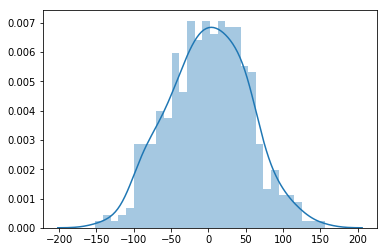

In [43]:
resid = y_hat - ds.target
sns.distplot(resid,bins=30)

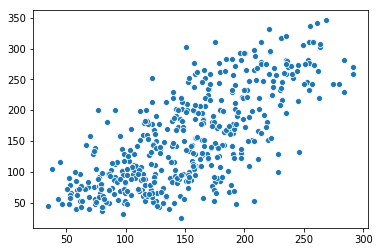

In [50]:
sns.scatterplot(y_hat,ds.target)

In [51]:
print('MAE:', metrics.mean_absolute_error(ds.target, y_hat))
print('MSE:', metrics.mean_squared_error(ds.target, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ds.target, y_hat)))

MAE: 43.27739508374989
MSE: 2859.6903987680657
RMSE: 53.47607314274362


### Compare the model obtained by manual method to preexisting libraries

In [48]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
lm = LinearRegression()
lm.fit(ds.data,ds.target)

print(lm.intercept_) # print the intercept
print(lm.coef_) # print rest of the coeddicients

152.1334841628965
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


In [52]:
# Compare with manual method
print(W)

[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
  152.13348416]


In [67]:
coeff_skl = np.append(lm.coef_,lm.intercept_)
coeff_skl
np.array_equal(np.round(coeff_skl,5),np.round(W,5)) # Are they equal

True